# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Задание:" data-toc-modified-id="Задание:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание:</a></div><div class="lev3 toc-item"><a href="#Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:" data-toc-modified-id="Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:-101"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Проверить работу реализованного алгоритма с различным числом кластеров:</a></div><div class="lev3 toc-item"><a href="#За-выполнение-ДЗ:" data-toc-modified-id="За-выполнение-ДЗ:-102"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>За выполнение ДЗ:</a></div>

In [68]:
import numpy as np
import math
import pandas as pd

In [69]:
import matplotlib.pyplot as plt

In [70]:
%matplotlib inline

# Задание:

Реализовать алгоритм кластеризации k-means

In [71]:
class KMeans:
    def __init__(self, n_clusters=2, metric='euclidean', max_iter=300, tol=0.001):
        '''
        n_clusters - число кластеров
        metric - метрика
        max_iter - максимальное число итераций
        tol - расстояние между центрами, определяющее сходимость
        '''
        self.n_clusters = n_clusters
        self.metric = metric
        self.max_iter = max_iter
        self.tol = tol

    #@staticmethod
    
    def distance(self, vector1, vector2):
        if self.metric == 'euclidean':
            return math.sqrt(pow((vector2-vector1),2).sum())
        if self.metric == 'chebyshev':
            return abs(vector2-vector1).max()
        if self.metric == 'manhattan':
            return abs(vector2-vector1).sum()
        
        
    
    def predict(self, X):
        '''
        Предсказываем попадание объектов из X в конкретный кластер
        '''
        X=np.array(X)
        belong=np.zeros((len(X), 1))
        for i in range(0,X.shape[0]):
            min = self.distance(X[i],self.centers[0])
            belong[i] = 0
            for j in range(1,self.n_clusters):
                if self.distance(X[i],self.centers[j])<min:
                    min = self.distance(X[i],self.centers[j])
                    belong[i] = j
        self.labels = belong
        return belong
    

    def fit(self, X):
        centers = np.zeros((self.n_clusters, X.shape[1]))
        X=np.array(X)
        for i in range(0,self.n_clusters):
            centers[i] = X[math.floor(X.shape[0]*i/self.n_clusters):math.floor(X.shape[0]*(i+1)/self.n_clusters),:].sum(axis=0)*self.n_clusters/X.shape[0]
        
        '''
        Шаг 2 - Выполняем уточнение положения центров кластеров до тех пор, пока 
        не будет превышено значение max_iter или центры кластеров не будут меняться 
        '''
        for step in range(self.max_iter):            
            '''
            Шаг 2.1 - Вычисляем расстояние до цетров кластеров
            '''
            
            '''
            Шаг 2.2 - Для каждого объекта находим argmin от расстояний до центров
            '''
            belong=np.zeros((len(X), 1))
            for i in range(0,X.shape[0]):
                min = self.distance(X[i],centers[0])
                belong[i] = 0
                for j in range(1,self.n_clusters):
                    if self.distance(X[i],centers[j])<min:
                        min = self.distance(X[i],centers[j])
                        belong[i] = j
            X_new = np.concatenate((X,belong), axis=1)
            
            '''
            Шаг 2.3 - Уточняеням положения центров кластеров
            '''
            k=0
            for i in range(0,self.n_clusters):
                a = X_new[X_new[:,X.shape[1]] == i][:,:X.shape[1]].sum(axis=0)/X_new[X_new[:,X.shape[1]] == i].shape[0]
                if self.distance(centers[i,:],a)>self.tol:
                    k=1
                centers[i,:] = a
            if k==0:
                break;
        '''
        Шаг 3 - Сохраняем положения центров кластеров
        ''' 
        self.centers = centers
        
        '''
        Шаг 4 - Возвращяем предсказание
        '''        
        return self.predict(X)

### Проверить работу реализованного алгоритма с различным числом кластеров:
* Для тестовых наборов данных (dataset1, dataset2, dataset3)
* Для задачи кластеризации цветов на изображении (пример в k-means_photo_clusterization)

### За выполнение ДЗ: 
* 6 баллов за реализацию алгоритма
* +2 балла за возможность выбора метрики
    - Евклидово расстояние
    - Расстояние Чебышева
    - Манхэттенское расстояние

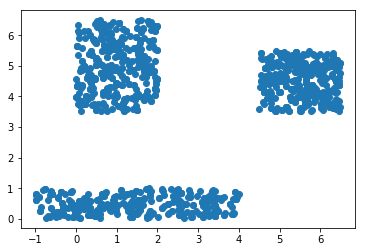

In [72]:
data = pd.read_csv('dataset2.csv', sep='\t', header=None)
plt.plot(data[0],data[1],'o')
plt.show()

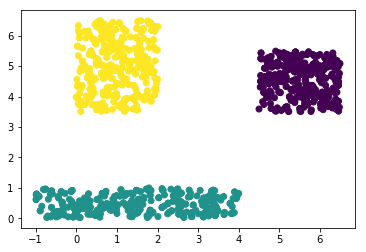

In [73]:
kmeans = KMeans(n_clusters = 3, max_iter=300, metric = 'euclidean').fit(data)
plt.figure()
plt.scatter(data[0].values,data[1].values, c=kmeans)
plt.show()